# Information visualization project : Weather in Australia
### GAILLY Vincent 547819 [ULB]
## Dependencies

#### Pandas

In [1]:
import pandas as pd

#### Numpy

In [2]:
import numpy as np

#### Matplotlib

In [3]:
import matplotlib.pyplot as plt

#### Seaborn

In [4]:
import seaborn as sns

## Rain in Australia Dataset

In [5]:
df1 = pd.read_csv("data/weatherAUS.csv")

In [6]:
#df1.loc[df1['Location'] == 'Albury'].tail(2)
#list(df1.loc[df1['Location'] == 'Albury'].tail(2)['Date'])[0]
#df1[df1.notnull().all(1)]
df1.tail(10)

# test

# Average of the column to fill up the nan.

#df2 = df1[df1.notnull().all(1)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [49]:
import datetime
from functools import reduce

#Nb of NaN value in the sunshine,evaporation,pressure9am,pressure3pm,Cloud9am,Cloud3pm columns for each city
df2_1 = df1.Sunshine.isnull().groupby([df1['Location']]).count().astype(int)
df2_2 = df1.Evaporation.isnull().groupby([df1['Location']]).count().astype(int)
df2_3 = df1.Pressure9am.isnull().groupby([df1['Location']]).count().astype(int)
df2_4 = df1.Pressure3pm.isnull().groupby([df1['Location']]).count().astype(int)
df2_5 = df1.Cloud9am.isnull().groupby([df1['Location']]).count().astype(int)
df2_6 = df1.Cloud3pm.isnull().groupby([df1['Location']]).count().astype(int)

#Nb of value in the sunshine,evaporation,pressure9am,pressure3pm,Cloud9am,Cloud3pm columns for each city 
df3_1 = df1.Sunshine.groupby([df1['Location']]).count().astype(int)
df3_2 = df1.Evaporation.groupby([df1['Location']]).count().astype(int)
df3_3 = df1.Pressure9am.groupby([df1['Location']]).count().astype(int)
df3_4 = df1.Pressure3pm.groupby([df1['Location']]).count().astype(int)
df3_5 = df1.Cloud9am.groupby([df1['Location']]).count().astype(int)
df3_6 = df1.Cloud3pm.groupby([df1['Location']]).count().astype(int)

#Create a tab with the percentage of NaN for the sunshine column for each city
df4_1 = pd.merge(df2_1, df3_1, how="left", on="Location")
df4_1.rename(columns = {'Sunshine_x':'Sunshine_NaN','Sunshine_y':'Sunshine_Other'}, inplace = True)
val = [0 for i in range(df4_1.shape[0])]
df4_1['PercentageOfNaN_Sunshine'] = val
for name,row in df4_1.iterrows():
    sum = row[0] + row[1]
    percentage = (row[0]/sum)*100
    df4_1.at[name, 'PercentageOfNaN_Sunshine'] = percentage
    
#Create a tab with the percentage of NaN for the evaporation colum for each city
df4_2 = pd.merge(df2_2, df3_2, how="left", on="Location")
df4_2.rename(columns = {'Evaporation_x':'Evaporation_NaN','Evaporation_y':'Evaporation_Other'}, inplace = True)
val = [0 for i in range(df4_2.shape[0])]
df4_2['PercentageOfNaN_Evaporation'] = val
for name,row in df4_2.iterrows():
    sum = row[0] + row[1]
    percentage = (row[0]/sum)*100
    df4_2.at[name, 'PercentageOfNaN_Evaporation'] = percentage
    
#Create a tab with the percentage of NaN for the pressure9am colum for each city
df4_3 = pd.merge(df2_3, df3_3, how="left", on="Location")
df4_3.rename(columns = {'Pressure9am_x':'Pressure9am_NaN','Pressure9am_y':'Pressure9am_Other'}, inplace = True)
val = [0 for i in range(df4_3.shape[0])]
df4_3['PercentageOfNaN_Pressure9am'] = val
for name,row in df4_3.iterrows():
    sum = row[0] + row[1]
    percentage = (row[0]/sum)*100
    df4_3.at[name, 'PercentageOfNaN_Pressure9am'] = percentage
    
#Create a tab with the percentage of NaN for the pressure3pm colum for each city
df4_4 = pd.merge(df2_4, df3_4, how="left", on="Location")
df4_4.rename(columns = {'Pressure3pm_x':'Pressure3pm_NaN','Pressure3pm_y':'Pressure3pm_Other'}, inplace = True)
val = [0 for i in range(df4_4.shape[0])]
df4_4['PercentageOfNaN_Pressure3pm'] = val
for name,row in df4_4.iterrows():
    sum = row[0] + row[1]
    percentage = (row[0]/sum)*100
    df4_4.at[name, 'PercentageOfNaN_Pressure3pm'] = percentage
    
#Create a tab with the percentage of NaN for the Cloud9am colum for each city
df4_5 = pd.merge(df2_5, df3_5, how="left", on="Location")
df4_5.rename(columns = {'Cloud9am_x':'Cloud9am_NaN','Cloud9am_y':'Cloud9am_Other'}, inplace = True)
val = [0 for i in range(df4_5.shape[0])]
df4_5['PercentageOfNaN_Cloud9am'] = val
for name,row in df4_5.iterrows():
    sum = row[0] + row[1]
    percentage = (row[0]/sum)*100
    df4_5.at[name, 'PercentageOfNaN_Cloud9am'] = percentage
    
#Create a tab with the percentage of NaN for the Cloud3pm colum for each city
df4_6 = pd.merge(df2_6, df3_6, how="left", on="Location")
df4_6.rename(columns = {'Cloud3pm_x':'Cloud3pm_NaN','Cloud3pm_y':'Cloud3pm_Other'}, inplace = True)
val = [0 for i in range(df4_6.shape[0])]
df4_6['PercentageOfNaN_Cloud3pm'] = val
for name,row in df4_6.iterrows():
    sum = row[0] + row[1]
    percentage = (row[0]/sum)*100
    df4_6.at[name, 'PercentageOfNaN_Cloud3pm'] = percentage
    
#Merge the tables df4_* into one table
df4_7 = reduce(lambda  left,right: pd.merge(left,right,on=['Location'],how='left'), [df4_1,df4_2,df4_3,df4_4,df4_5,df4_6])
df4 = df4_7.drop(["Sunshine_NaN", "Sunshine_Other","Evaporation_NaN","Evaporation_Other","Pressure9am_NaN","Pressure9am_Other","Pressure3pm_NaN","Pressure3pm_Other","Cloud9am_NaN","Cloud9am_Other","Cloud3pm_NaN","Cloud3pm_Other"], axis=1)
df4.rename(columns = {'PercentageOfNaN_Sunshine':'%_Sunshine','PercentageOfNaN_Evaporation':'%_Evaporation','PercentageOfNaN_Pressure9am':'%_Pressure9am','PercentageOfNaN_Pressure3pm':'%_Pressure3pm','PercentageOfNaN_Cloud9am':'%_Cloud9am','PercentageOfNaN_Cloud3pm':'%_Cloud3pm'}, inplace = True)

#To get the maximum date and get the start and end date for each location
city_lst = list(df1['Location'].drop_duplicates())
start_lst = [list(df1.loc[df1['Location'] == 'Albury'].head(1)['Date'])[0]]
end_lst = [list(df1.loc[df1['Location'] == 'Albury'].tail(2)['Date'])[0]]
max_date = pd.to_datetime(list(df1.loc[df1['Location'] == 'Albury'].head(1)['Date'])[0])
for city in city_lst[1:]:
    date = pd.to_datetime(list(df1.loc[df1['Location'] == city].head(1)['Date'])[0])
    start_lst.append(list(df1.loc[df1['Location'] == city].head(1)['Date'])[0])
    end_lst.append(list(df1.loc[df1['Location'] == city].tail(2)['Date'])[0])
    if date > max_date:
        max_date = date
data = {'Location':city_lst, 'Start_Date':start_lst, 'End_Date':end_lst}
df5 = pd.DataFrame(data)
        
start = datetime.datetime.strptime("2009-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2017-06-26", "%Y-%m-%d")
date_lst = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
date_lst = [date.strftime("%Y-%m-%d") for date in date_lst]

#We verify that they are no missing date from the maximum date to the end.
nb_missing_date = []
for city in city_lst:
    city_data = df1.loc[(df1['Location'] == city) & (df1['Date'] >= '2009-01-01') & (df1['Date'] < '2017-06-25')]
    if city_data['Date'].count() != 3098:
        missing_date = []
        #print(city, 3098 - city_data['Date'].count())
        for date in date_lst:
            if date not in list(city_data['Date']):
                missing_date.append(date)
        #print(missing_date[0])
        #print(missing_date[30])
        #print(missing_date[61])
        nb_missing_date.append(len(missing_date))
        
data = {'Location':city_lst, 'Number of missing date':nb_missing_date}
df6 = pd.DataFrame(data)

#Cities that we must delete from the dataset: 
#- Nhil
#- Katherine
#- Uluru

#The missing months are: 
# - April of year 2011
# - December of year 2012
# - February of year 2013  

df4


,%_Sunshine,%_Evaporation,%_Pressure9am,%_Pressure3pm,%_Cloud9am,%_Cloud3pm
Location,,,,,,
Adelaide,64.349053,65.203186,50.062716,50.054868,100.000000,100.000000
Albany,54.676259,52.504318,50.206441,50.206441,50.314465,56.621345
Albury,100.000000,100.000000,50.041152,50.065876,70.224070,68.054623
AliceSprings,54.676259,51.832907,50.008225,50.024683,52.906370,53.156146
BadgerysCreek,100.000000,100.000000,51.435897,51.479897,100.000000,100.000000
Ballarat,100.000000,100.000000,50.198151,50.214734,54.933141,60.413355
Bendigo,100.000000,71.952663,50.123660,50.082372,59.467919,57.272042
Brisbane,50.386618,50.149207,50.007831,50.062716,50.007831,50.015664
Cairns,54.246966,53.239930,50.008225,50.000000,51.762302,51.965812


<class 'str'>
['Watsonia', 'SydneyAirport', 'Sydney', 'PerthAirport', 'Perth', 'PearceRAAF', 'MelbourneAirport', 'Melbourne', 'Hobart', 'Darwin', 'Brisbane', 'Mildura', 'Nuriootpa', 'WaggaWagga', 'Townsville', 'Portland', 'NorfolkIsland', 'MountGambier', 'Dartmoor', 'Cairns', 'AliceSprings', 'Albany', 'Moree', 'Woomera', 'Sale', 'Adelaide', 'CoffsHarbour', 'Williamtown', 'Canberra', 'Cobar', 'Wollongong', 'Witchcliffe', 'Richmond', 'Newcastle', 'MountGinini', 'Launceston', 'GoldCoast', 'Bendigo', 'Ballarat', 'BadgerysCreek', 'Albury']
[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 95, 94, 85, 85, 85, 85, 85, 85, 84, 82, 82, 68, 66, 60, 52, 49, 45, 36, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


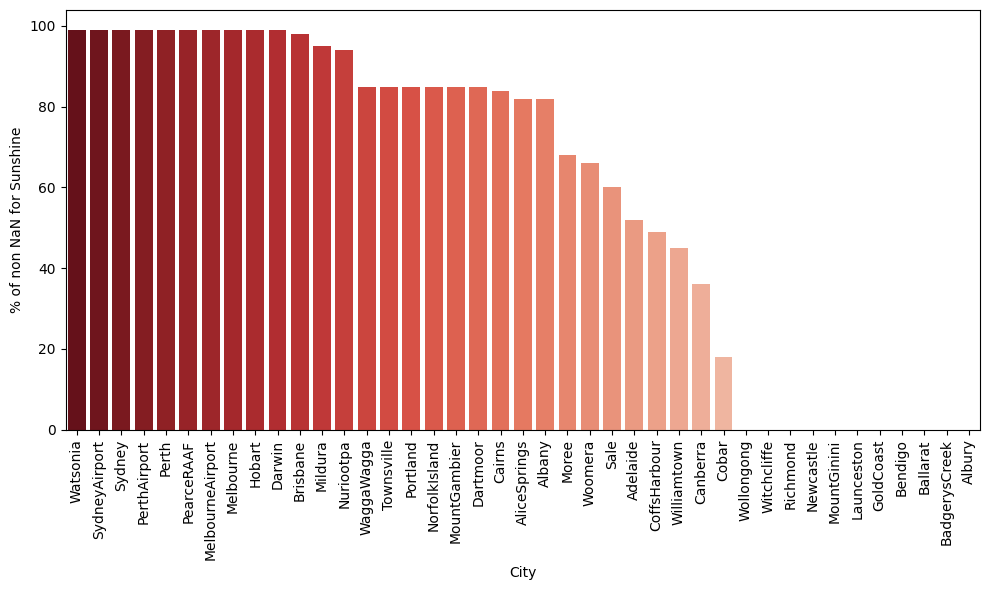

In [48]:
import re
#Check how the distribution of some attribute for each city (by month,quarter, year)

city_lst = list(df1['Location'].drop_duplicates())
city_lst.remove("Nhil")
city_lst.remove("Katherine")
city_lst.remove("Uluru")
city_lst.remove("NorahHead")
city_lst.remove("Penrith")
city_lst.remove("Tuggeranong")
city_lst.remove("Walpole")
city_lst.remove("SalmonGums")
date_lst_2 = list(df1.loc[(df1['Location'] == 'Albury') & (df1['Date'] >= '2009-01-01') & (df1['Date'] < '2017-06-25')]['Date'].drop_duplicates())

start_date = []
end_date = []
for date in date_lst_2:
    '''if (re.search("[0-9]{4}-[0-9]{2}-01$",date)):
        start_date.append(date)
    if (re.search("2017-06-24$",date) or re.search("[0-9]{4}-(01|03|05|07|08|10|12)-31$",date) or re.search("[0-9]{4}-(04|06|09|11)-30$",date) or re.search("(2009|2010|2011|2013|2014|2015|2017)-02-28$",date) or re.search("(2012|2016)-02-29$",date)):
        end_date.append(date)''' #For the month
    if (re.search("[0-9]{4}-01-01$",date)):
        start_date.append(date)
    if (re.search("[0-9]{4}-12-31$",date) or re.search("2017-06-24$",date) or re.search("2012-11-30$",date)):
        end_date.append(date)

cnt = []
for city in city_lst:
    cnt_tmp = []
    for start,end in zip(start_date,end_date):
        cnt_tmp.append(df1.loc[(df1['Location'] == city) & (df1['Date'] >= start) & (df1['Date'] <= end)]['Sunshine'].count())
    #print(df1.loc[(df1['Location'] == city) & (df1['Date'] >= "2009-01-01") & (df1['Date'] <= "2017-06-25")]['Date'].count())
    cnt.append((np.sum(cnt_tmp)/df1.loc[(df1['Location'] == city) & (df1['Date'] >= "2009-01-01") & (df1['Date'] <= "2017-06-25")]['Date'].count())*100)

dtype = [('city',type),('cnt',int)]
val = list(zip(city_lst,cnt))

lst_tmp = np.sort(np.array(val,dtype=dtype),order='cnt')[::-1]
lst_final = list(zip(*lst_tmp))

'''data = {'Location':city_lst, '% of non NaN value for the Sunshine attribute': cnt}
df8 = pd.DataFrame(data)
df8'''

plt.figure(figsize=(10,6))
sns.barplot(x=list(lst_final[0]),y=list(lst_final[1]),palette="Reds_r")
plt.xlabel("City")
plt.ylabel("% of non NaN for Sunshine")
plt.xticks(rotation=90)
plt.tight_layout()


<class 'str'>
['Watsonia', 'SydneyAirport', 'PerthAirport', 'Perth', 'MelbourneAirport', 'Darwin', 'Brisbane', 'Albany', 'NorfolkIsland', 'Mildura', 'Katherine', 'MountGambier', 'Nuriootpa', 'Townsville', 'Cairns', 'WaggaWagga', 'Newcastle', 'Sale', 'AliceSprings', 'Woomera', 'Cobar', 'Portland', 'Moree', 'Sydney', 'Ballarat', 'Williamtown', 'CoffsHarbour', 'Bendigo', 'PearceRAAF', 'Melbourne', 'Canberra', 'Hobart', 'Wollongong', 'Albury', 'Launceston', 'Uluru', 'Richmond', 'Witchcliffe', 'Walpole', 'Tuggeranong', 'SalmonGums', 'Penrith', 'NorahHead', 'Nhil', 'MountGinini', 'GoldCoast', 'Dartmoor', 'BadgerysCreek', 'Adelaide']
[99, 99, 99, 99, 99, 99, 99, 98, 97, 97, 97, 96, 95, 94, 93, 92, 92, 88, 88, 87, 87, 86, 82, 81, 81, 79, 72, 67, 65, 65, 64, 61, 44, 42, 24, 21, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


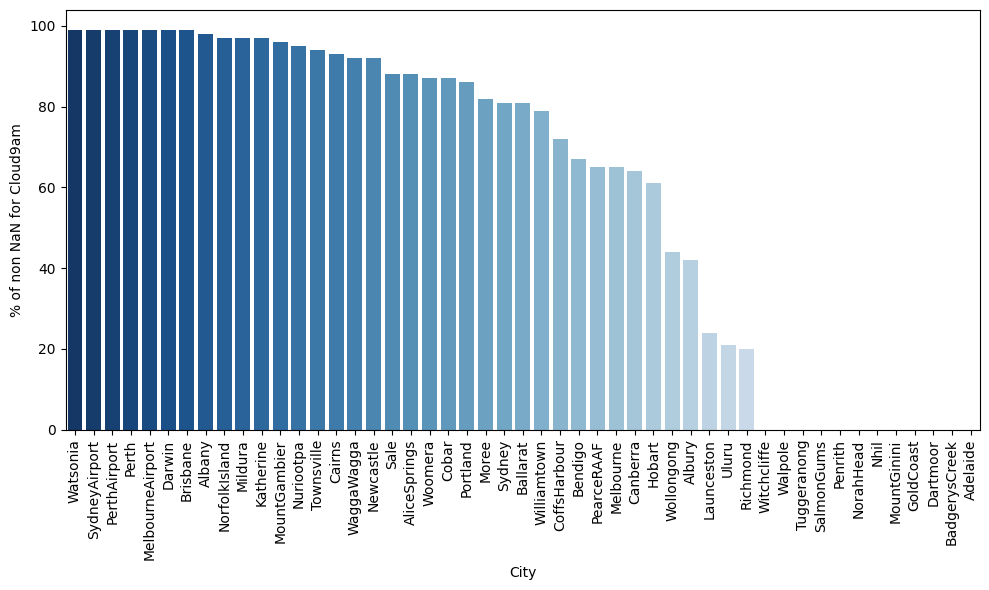

In [51]:
cnt = []
for city in city_lst:
    cnt_tmp = []
    for start,end in zip(start_date,end_date):
        cnt_tmp.append(df1.loc[(df1['Location'] == city) & (df1['Date'] >= start) & (df1['Date'] <= end)]['Cloud9am'].count())
    #print(df1.loc[(df1['Location'] == city) & (df1['Date'] >= "2009-01-01") & (df1['Date'] <= "2017-06-25")]['Date'].count())
    cnt.append((np.sum(cnt_tmp)/df1.loc[(df1['Location'] == city) & (df1['Date'] >= "2009-01-01") & (df1['Date'] <= "2017-06-25")]['Date'].count())*100)

dtype = [('city',type),('cnt',int)]
val = list(zip(city_lst,cnt))

lst_tmp = np.sort(np.array(val,dtype=dtype),order='cnt')[::-1]
lst_final = list(zip(*lst_tmp))

'''data = {'Location':city_lst, '% of non NaN value for the Cloud9am attribute': cnt}
df8 = pd.DataFrame(data)
df8'''

plt.figure(figsize=(10,6))
sns.barplot(x=list(lst_final[0]),y=list(lst_final[1]),palette="Blues_r")
plt.xlabel("City")
plt.ylabel("% of non NaN for Cloud9am")
plt.xticks(rotation=90)
plt.tight_layout()

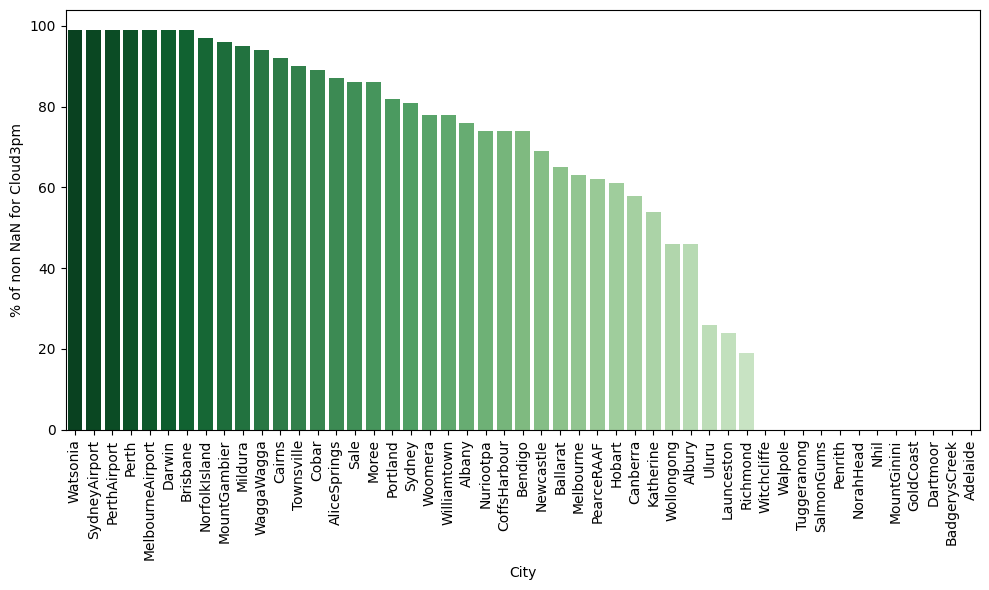

In [53]:
cnt = []
for city in city_lst:
    cnt_tmp = []
    for start,end in zip(start_date,end_date):
        cnt_tmp.append(df1.loc[(df1['Location'] == city) & (df1['Date'] >= start) & (df1['Date'] <= end)]['Cloud3pm'].count())
    #print(df1.loc[(df1['Location'] == city) & (df1['Date'] >= "2009-01-01") & (df1['Date'] <= "2017-06-25")]['Date'].count())
    cnt.append((np.sum(cnt_tmp)/df1.loc[(df1['Location'] == city) & (df1['Date'] >= "2009-01-01") & (df1['Date'] <= "2017-06-25")]['Date'].count())*100)

dtype = [('city',type),('cnt',int)]
val = list(zip(city_lst,cnt))

lst_tmp = np.sort(np.array(val,dtype=dtype),order='cnt')[::-1]
lst_final = list(zip(*lst_tmp))

'''data = {'Location':city_lst, '% of non NaN value for the Cloud3pm attribute': cnt}
df8 = pd.DataFrame(data)
df8'''

plt.figure(figsize=(10,6))
sns.barplot(x=list(lst_final[0]),y=list(lst_final[1]),palette="Greens_r")
plt.xlabel("City")
plt.ylabel("% of non NaN for Cloud3pm")
plt.xticks(rotation=90)
plt.tight_layout()

In [67]:
import re
#Check how the distribution of some attribute for each city (by month,quarter, year)

city_lst = list(df1['Location'].drop_duplicates())
city_lst.remove("Nhil")
city_lst.remove("Katherine")
city_lst.remove("Uluru")
city_lst.remove("NorahHead")
city_lst.remove("Penrith")
city_lst.remove("Tuggeranong")
city_lst.remove("Walpole")
city_lst.remove("SalmonGums")
date_lst_2 = list(df1.loc[(df1['Location'] == 'Albury') & (df1['Date'] >= '2009-01-01') & (df1['Date'] < '2017-06-25')]['Date'].drop_duplicates())

start_date = []
end_date = []
for date in date_lst_2:
    if (re.search("[0-9]{4}-01-01$",date) or re.search("[0-9]{4}-05-01$",date) or re.search("[0-9]{4}-09-01$",date)):
        start_date.append(date)
    if (re.search("[0-9]{4}-04-30$",date) or re.search("[0-9]{4}-08-31$",date) or re.search("[0-9]{4}-12-31$",date) or re.search("2017-06-24$",date) or re.search("2011-03-31$",date) or re.search("2012-11-30$",date)):
        end_date.append(date)

cnt = []
for city in city_lst:
    for start,end in zip(start_date,end_date):
        cnt.append(df1.loc[(df1['Location'] == city) & (df1['Date'] >= start) & (df1['Date'] <= end)]['Sunshine'].count())

cities = []
for city in city_lst:
    for i in range(26):
        cities.append(city)

start_dates = []
end_dates = []
for i in range(41):
    for start,end in zip(start_date,end_date):
        start_dates.append(start)
        end_dates.append(end)

print(len(start_date),len(end_date),len(city_lst),len(cnt))
data = {'Location':cities,'Start_date':start_dates,'End_date':end_dates,'Nb non NaN value for the Sunshine attribute': cnt}
df8 = pd.DataFrame(data)

#Nb of non NaN value for each city by period of 4 months 


26 26 41 1066


,Location,Start_date,End_date,Nb non NaN value for the Sunshine attribute
0,Albury,2009-01-01,2009-04-30,0
1,Albury,2009-05-01,2009-08-31,0
2,Albury,2009-09-01,2009-12-31,0
3,Albury,2010-01-01,2010-04-30,0
4,Albury,2010-05-01,2010-08-31,0
...,...,...,...,...
995,Launceston,2011-05-01,2011-08-31,0
996,Launceston,2011-09-01,2011-12-31,0
997,Launceston,2012-01-01,2012-04-30,0
998,Launceston,2012-05-01,2012-08-31,0


In [72]:
writer = pd.ExcelWriter('Nb_non_NaN_sunshine.xlsx')
df8.to_excel(writer)
writer.save()

## Australia Cities Dataset

In [9]:
df2 = pd.read_csv("data/au.csv")

In [10]:
df2.head(10)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714
5,Gold Coast,-28.0167,153.4000,Australia,AU,Queensland,NaN,679127,638090
6,Canberra,-35.2931,149.1269,Australia,AU,Australian Capital Territory,primary,426704,381488
7,Newcastle,-32.9167,151.7500,Australia,AU,New South Wales,NaN,322278,152984
8,Wollongong,-34.4331,150.8831,Australia,AU,New South Wales,NaN,302739,289236
9,Geelong,-38.1500,144.3500,Australia,AU,Victoria,NaN,263280,191440


In [11]:
df2.count()

city                 1035
lat                  1035
lng                  1035
country              1035
iso2                 1035
admin_name           1035
capital                 9
population           1035
population_proper    1035
dtype: int64

## Quaterly Tourism in Australia Dataset

In [12]:
df3 = pd.read_csv("data/tourism.csv")

In [13]:
df3.head(10)

,Unnamed: 0,Quarter,Region,State,Purpose,Trips
0,1,1998-01-01,Adelaide,South Australia,Business,135.077690
1,2,1998-04-01,Adelaide,South Australia,Business,109.987316
2,3,1998-07-01,Adelaide,South Australia,Business,166.034687
3,4,1998-10-01,Adelaide,South Australia,Business,127.160464
4,5,1999-01-01,Adelaide,South Australia,Business,137.448533
5,6,1999-04-01,Adelaide,South Australia,Business,199.912586
6,7,1999-07-01,Adelaide,South Australia,Business,169.355090
7,8,1999-10-01,Adelaide,South Australia,Business,134.357937
8,9,2000-01-01,Adelaide,South Australia,Business,154.034398
9,10,2000-04-01,Adelaide,South Australia,Business,168.776364


In [14]:
df3.count()

Unnamed: 0    23408
Quarter       23408
Region        23408
State         23408
Purpose       23408
Trips         23408
dtype: int64

## Preprocessing